# MNIST - Categorical Classification
> # Batch Normalization
## Import Tensorflow & Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

* TensorFlow Version 지정

In [2]:
# %tensorflow_version 1.x
import tensorflow as tf

tf.__version__

'2.5.0'

* GPU 설정 확인

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

* Keras Version 확인

In [4]:
import keras

keras.__version__

'2.5.0'

# I. MNIST Data_Set Load

In [5]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

* Normalization

In [7]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255

> ## 2) One Hot Encoding

In [8]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 * 활성화 함수의 입력값을 정규화 과정을 수행하여 전달
 * Gradient Vanishing 문제 해결 및 더 큰 Learning Rate를 사용 가능

In [9]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape=(28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [10]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

> ## 2) Model Compile

* 모델 학습방법 설정

In [11]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행(약 5분)

In [12]:
Hist_mnist = mnist.fit(train_images, train_labels,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 18s 6ms/step - loss: 0.3070 - accuracy: 0.9067 - val_loss: 0.1245 - val_accuracy: 0.9603
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0721 - accuracy: 0.9779 - val_loss: 0.1018 - val_accuracy: 0.9701
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0430 - accuracy: 0.9869 - val_loss: 0.0876 - val_accuracy: 0.9762
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0788 - val_accuracy: 0.9798
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0216 - accuracy: 0.9924 - val_loss: 0.0811 - val_accuracy: 0.9796
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0976 - val_accuracy: 0.9766
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0858 - val_accuracy: 0.978

> ## 4) 학습 결과 시각화

* Loss Visualization

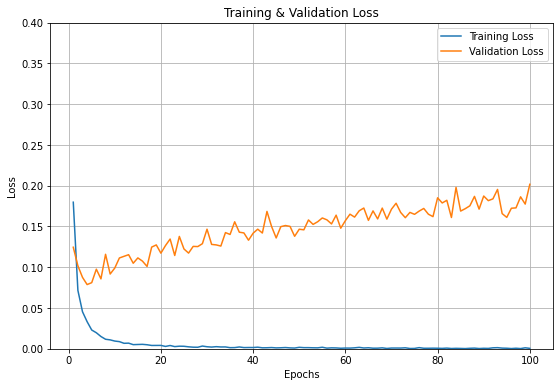

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [14]:
loss, accuracy = mnist.evaluate(test_images, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1846 - accuracy: 0.9818
Loss = 0.18456
Accuracy = 0.98180


# 
# 
# 
# The End
# 
# 
# 